# DSN Pre_Bootcamp Hackathon (Expresso Churn Prediction Challenge)

- **OBJECTIVE** : To Predict whether a customer will switch from one network provider to another...

## Variable Definitions



- The churn dataset includes 19 variables including 15 numeric variables and 04 categorical variables.

    **user_id**
    
    **REGION**: the location of each client
        
    **TENURE** :duration in the network
        
    **MONTANT** : top-up amount
        
    **FREQUENCE_RECH** :Â number of times the customer refilled
        
    **REVENUE** :monthly income of each client
        
    **ARPU_SEGMENT**: income over 90 days / 3
        
    **FREQUENCE**: number of times the client has made an income
        
    **DATA_VOLUME**: number of connections
        
    **ON_NET**: inter expresso call
    
    **ORANGE**: call to orange
        
    **TIGO**: call to Tigo
        
    **ZONE1**: call to zones1
        
    **ZONE2**:call to zones2
        
    **MRG**:client who is going 
        
    **REGULARITY** : number of times the client is active for 90 days
        
    **TOP_PACK** : the most active packs
        
    **FREQ_TOP_PACK**: number of times the client has activated the top pack packages
        
    **CHURN** : variable to predict - Target
        


## Import Relevant Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import lightgbm as lgbm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold  #we'll use stratified folds
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV#we will do hyperparameters tuning


## Read Files

In [2]:
path_1 ='C:/Users/ALEX/Desktop/pre_bootcamp/Train (1).csv'
path_2 = 'C:/Users/ALEX/Desktop/pre_bootcamp/Test (1).csv'
df_train = pd.read_csv(path_1)
df_test = pd.read_csv(path_2)

In [3]:
print('Test data shape: {}'.format(df_test.shape))
print('Train data shape: {}'.format(df_train.shape))

Test data shape: (100000, 18)
Train data shape: (400000, 19)


In [4]:
df_train.isnull().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [5]:
df_test.isnull().sum()

user_id               0
REGION            39293
TENURE                0
MONTANT           34951
FREQUENCE_RECH    34951
REVENUE           33490
ARPU_SEGMENT      33490
FREQUENCE         33490
DATA_VOLUME       49338
ON_NET            36383
ORANGE            41200
TIGO              59788
ZONE1             92320
ZONE2             93578
MRG                   0
REGULARITY            0
TOP_PACK          41703
FREQ_TOP_PACK     41703
dtype: int64

In [6]:
## interactions and feature engineering
df_train['REGION_TENURE'] = df_train['REGION'] + ' ' + df_train['TENURE']

df_train['NOT_FREQUENCE_RECH'] = df_train['FREQUENCE_RECH'] - df_train['FREQ_TOP_PACK']
#df_train['PROD_REGU_ON_NET'] = df_train['REGULARITY'] * df_train['ON_NET']
#df_train['PROD_ARPU_MONTANT'] = df_train['MONTANT'] * df_train['ARPU_SEGMENT']
#df_train['PROD_REGU_ON_NET'] = df_train['REVENUE'] * df_train['ARPU_SEGMENT']
#df_train['PROD_REVENUE_MONTANT'] = df_train['MONTANT'] * df_train['REVENUE']
#df_train['NON_ACTIVE_CONNECTIONS'] = df_train['DATA_VOLUME'] - df_train['REGULARITY']


#df_test['NON_ACTIVE_CONNECTIONS'] = df_test['DATA_VOLUME'] - df_test['REGULARITY']
#df_test['PROD_DATA_ON_NET'] = df_test['DATA_VOLUME'] * df_test['ON_NET']\
#df_test['PROD_REGU_ON_NET'] = df_test['REVENUE'] * df_test['ARPU_SEGMENT']
#df_test['PROD_REVENUE_MONTANT'] = df_test['MONTANT'] * df_test['REVENUE']
#df_test['PROD_REGU_ON_NET'] = df_test['REGULARITY'] * df_test['ON_NET']
#df_test['PROD_ARPU_MONTANT'] = df_test['MONTANT'] * df_test['ARPU_SEGMENT']
df_test['REGION_TENURE'] = df_test['REGION'] + ' ' + df_test['TENURE']

df_test['NOT_FREQUENCE_RECH'] = df_test['FREQUENCE_RECH'] - df_test['FREQ_TOP_PACK']


In [7]:
categorical_features = df_train.select_dtypes(include=[np.object])
categorical_features.columns

Index(['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK', 'REGION_TENURE'], dtype='object')

In [8]:
numeric_features = df_train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK', 'CHURN', 'NOT_FREQUENCE_RECH'],
      dtype='object')

In [9]:
df_train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,...,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,REGION_TENURE,NOT_FREQUENCE_RECH
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,...,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0,SAINT-LOUIS K > 24 month,-3.0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,...,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0,NaN,7.0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,...,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0,TAMBACOUNDA K > 24 month,0.0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,...,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0,FATICK K > 24 month,0.0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,...,NaN,NaN,NaN,NO,50,NaN,NaN,0,FATICK K > 24 month,NaN


##  EDA

### UNIVARIATE ANALYSIS

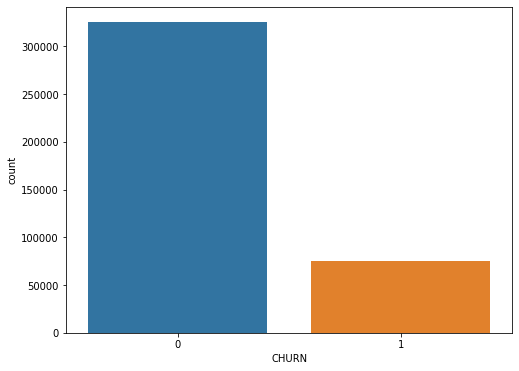

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="CHURN", data=df_train)

Text(0, 0.5, 'REGION')

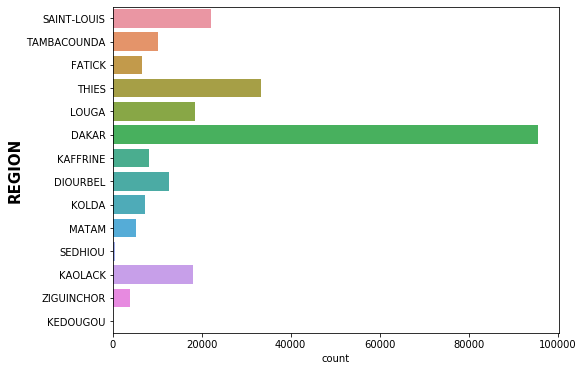

In [11]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="REGION", data=df_train)
plt.ylabel('REGION',fontsize=15,weight='bold')

Text(0, 0.5, 'TENURE')

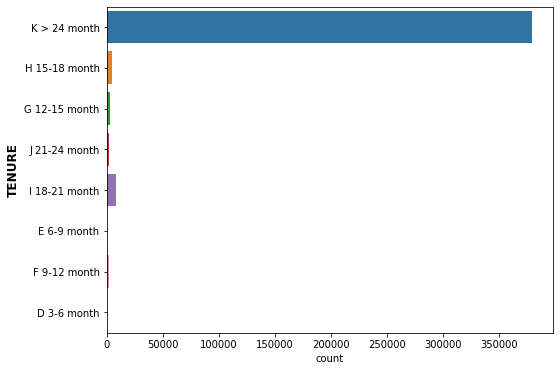

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="TENURE", data=df_train)
plt.ylabel('TENURE',fontsize=12,weight='bold')

In [13]:
df_train.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,NOT_FREQUENCE_RECH
MONTANT,1.000000,0.800385,0.979041,0.979041,0.781164,0.308343,0.327857,0.667531,0.427289,0.350551,0.407973,0.524157,0.742406,-0.106229,0.248241
FREQUENCE_RECH,0.800385,1.000000,0.807405,0.807405,0.956262,0.165226,0.402383,0.522649,0.348092,0.126573,0.160979,0.557178,0.866833,-0.123113,0.429081
REVENUE,0.979041,0.807405,1.000000,1.000000,0.791627,0.312915,0.331850,0.670220,0.425376,0.355228,0.377622,0.534122,0.751785,-0.114822,0.239683
ARPU_SEGMENT,0.979041,0.807405,1.000000,1.000000,0.791627,0.312915,0.331850,0.670220,0.425377,0.355228,0.377623,0.534120,0.751785,-0.114822,0.239682
FREQUENCE,0.781164,0.956262,0.791627,0.791627,1.000000,0.181491,0.392656,0.475057,0.311898,0.113051,0.164952,0.591314,0.843150,-0.139685,0.389057
DATA_VOLUME,0.308343,0.165226,0.312915,0.312915,0.181491,1.000000,-0.014683,0.066746,0.029573,0.034982,0.054873,0.198813,0.126535,-0.036015,0.078743
ON_NET,0.327857,0.402383,0.331850,0.331850,0.392656,-0.014683,1.000000,0.218051,0.138315,0.010337,-0.018135,0.268487,0.351834,-0.057701,0.149359
ORANGE,0.667531,0.522649,0.670220,0.670220,0.475057,0.066746,0.218051,1.000000,0.408712,0.042190,0.016740,0.310284,0.557338,-0.063382,0.012001
TIGO,0.427289,0.348092,0.425376,0.425377,0.311898,0.029573,0.138315,0.408712,1.000000,0.006882,0.015626,0.197842,0.375953,-0.035890,-0.003867
ZONE1,0.350551,0.126573,0.355228,0.355228,0.113051,0.034982,0.010337,0.042190,0.006882,1.000000,0.041978,0.042619,0.187581,0.019937,-0.101547


### Data Preprocessing

In [14]:
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()
cat_cols = ['REGION','TENURE','REGION_TENURE','TOP_PACK','MRG']
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode data
    impute_label = encoder.fit_transform(impute_reshape)
    #assign back encoded values to non-null values
    data.loc[data.notnull()]= np.squeeze(impute_label)
    return data

In [15]:
#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df_train[columns])


In [16]:
#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df_test[columns])


In [17]:
df_train.fillna(-999,inplace=True)

In [18]:
df_test.fillna(-999,inplace=True)

In [19]:
#One-hot Encoding
df_train = pd.get_dummies(df_train,columns=['REGION','TENURE'])
id_variable = df_train['user_id'] 

In [20]:
df_test = pd.get_dummies(df_test,columns=['REGION','TENURE'])


In [21]:
df_train.columns

Index(['user_id', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1',
       'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN',
       'REGION_TENURE', 'NOT_FREQUENCE_RECH', 'REGION_-999', 'REGION_0',
       'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'REGION_5', 'REGION_6',
       'REGION_7', 'REGION_8', 'REGION_9', 'REGION_10', 'REGION_11',
       'REGION_12', 'REGION_13', 'TENURE_0', 'TENURE_1', 'TENURE_2',
       'TENURE_3', 'TENURE_4', 'TENURE_5', 'TENURE_6', 'TENURE_7'],
      dtype='object')

In [24]:
ids  = df_train['user_id']
X= df_train.drop(['CHURN','user_id','ZONE1','ZONE2','MRG'],axis='columns')
y=df_train['CHURN']

In [25]:
ids2 = df_test['user_id']
test= df_test.drop(['user_id','ZONE1','ZONE2','MRG'],axis='columns')


In [26]:
X_scale = RobustScaler().fit_transform(X)
Xtest_scale = RobustScaler().fit_transform(test)

In [27]:
from sklearn.model_selection import train_test_split
'''Number of True cases(Churned customers) in test and training set derived from test_split_split'''
'''Check if individual classess in the tragte (CHURN) have the same rtio of positive class(1)'''
X_train,X_test,y_train,y_test, id_train, id_test=train_test_split(X, y, ids,stratify=y,test_size=0.25,random_state=42)
print ("No. of True Cases in training data set for" , y_train.values.ravel().sum())
print ("No. of True Cases in testing data set for",y_test.values.ravel().sum())

print ("Ratio of True Cases in training data set: " , round(y_train.values.ravel().sum()/len(y_train.values.ravel()),2))
print ("Ratio of True Cases in testing data set: ", round(y_test.values.ravel().sum()/len(y_test.values.ravel()),2))

No. of True Cases in training data set for 56133
No. of True Cases in testing data set for 18711
Ratio of True Cases in training data set:  0.19
Ratio of True Cases in testing data set:  0.19


In [28]:
X_test.shape

(100000, 37)

In [29]:
print(len(y_train.values.ravel())- y_train.values.ravel().sum())
print(len(y_test.values.ravel()) -y_test.values.ravel().sum())


243867
81289


In [30]:
df_train['CHURN'].value_counts()

0    325156
1     74844
Name: CHURN, dtype: int64

## Training models

In [ ]:
- We have approached evaluating our model using train_test_split but a much better means of model evaluation is cross validation
    - stratified k-fold and KFold are forms of cross-validation.
    - stratified k-fold works well for classifaction task with imbalanced clas distribution. 
       - KFold doesnt take that into consideration.
- Therefore in classification task with imbalanced class distribution we prefer StratifiedKfold to KFold

In [ ]:
 - cross_val_score flips the result value for error or loss metrics while it preserve sign for score metrics
    - for example mean_absolute_error and log_loss would be neg_mean_absolute_error  and neg_log_los would retain the same magnitude but returns negative value of metric

## Base Model Selection

In [33]:
# Plot confusion Matrix
def conftable(test,y_pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print('Confusion matrix\n\n', confmatrix)
    print('\nTrue Positives(TP) = ', confmatrix[0,0])
    print('\nTrue Negatives(TN) = ', confmatrix[1,1])
    print('\nFalse Positives(FP) = ', confmatrix[0,1])
    print('\nFalse Negatives(FN) = ', confmatrix[1,0])
    print (metrics.classification_report(y_test, y_pred))
    print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 3))

### Gaussian Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
# train  GNB classifier to predict churn
clf = GaussianNB()
trained_model_GNB = clf.fit(X_train, y_train)
print(trained_model_GNB)

GaussianNB(priors=None, var_smoothing=1e-09)


In [44]:
y_GNB_pred = trained_model_GNB.predict_proba(X_test)
GNB_score = log_loss(y_true=y_test,y_pred=y_GNB_pred[:,1])
print('GaussianNB log_loss score : {}'.format(GNB_score))
GNB_pred2 = trained_model_GNB.predict(X_test)
GNB_pred1 = trained_model_GNB.predict(X_train)
print('GNB Training accuracy: {}'.format(accuracy_score(y_train,GNB_pred1)))
print('GNB Testing accuracy: {}'.format(accuracy_score(y_test,GNB_pred2)))

GaussianNB log_loss score : 2.913935549374436
GNB Training accuracy: 0.7880361111111112
GNB Testing accuracy: 0.787675


### Logistic Regression Model

In [39]:

logreg = LogisticRegression(solver='liblinear') #We set a random state so that the results are reproducible
trained_model_lr = logreg.fit(X_train, y_train) #We train the model
print('Trained model:: ',trained_model_lr)
y_logreg = trained_model_lr.predict(X_test)
y_logreg_pred = trained_model_lr.predict_proba(X_test)  #We make predictions


Trained model::  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Logistic Regression log_loss score : 0.26735882070505107


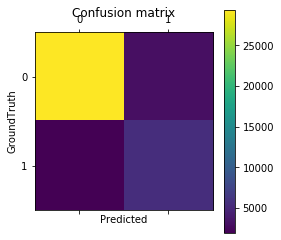

Confusion matrix

 [[29396  3119]
 [ 1949  5536]]

True Positives(TP) =  29396

True Negatives(TN) =  5536

False Positives(FP) =  3119

False Negatives(FN) =  1949
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     32515
           1       0.64      0.74      0.69      7485

    accuracy                           0.87     40000
   macro avg       0.79      0.82      0.80     40000
weighted avg       0.88      0.87      0.88     40000

Overall Accuracy: 0.873
Training score:0.8727027777777778
Testing score:0.8733


In [40]:
logreg_score = log_loss(y_true=y_test,y_pred=y_logreg_pred[:,1])
print('Logistic Regression log_loss score : {}'.format(logreg_score))
conftable(y_test,y_logreg,'conf')
print('Training score:{}'.format(logreg.score(X_train,y_train)))
print('Testing score:{}'.format(logreg.score(X_test,y_test)))

### RandomForest Classifier

In [41]:
# Create random forest classifier model to predict churn.
clf = RandomForestClassifier()#n_estimators = 10, criterion = 'entropy',max_depth = 7)
trained_model_rf = clf.fit(X_train, y_train)
print(trained_model_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [45]:
y_rf_pred = trained_model_rf.predict_proba(X_test)
rf_score = log_loss(y_true=y_test,y_pred=y_rf_pred[:,1])
print('RandomForest log_loss score : {}'.format(rf_score))
y_pred2 = trained_model_rf.predict(X_test)
rf_pred1 = trained_model_rf.predict(X_train)
print('Random Forest Training accuracy: {}'.format(accuracy_score(y_train,rf_pred1)))
print('Random Forest Testing accuracy: {}'.format(accuracy_score(y_test,y_pred2)))

RandomForest log_loss score : 0.3297619882212685
Random Forest Training accuracy: 0.9199166666666667
Random Forest Testing accuracy: 0.875125


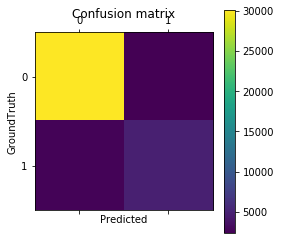

Confusion matrix

 [[30126  2389]
 [ 2606  4879]]

True Positives(TP) =  30126

True Negatives(TN) =  4879

False Positives(FP) =  2389

False Negatives(FN) =  2606
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     32515
           1       0.67      0.65      0.66      7485

    accuracy                           0.88     40000
   macro avg       0.80      0.79      0.79     40000
weighted avg       0.87      0.88      0.87     40000

Overall Accuracy: 0.875


In [46]:
conftable(y_test,y_pred2,'conf')

### LightGBM Model

In [47]:
train_data = lgbm.Dataset(X_train, label=y_train)
test_data = lgbm.Dataset(X_test, label=y_test)
lgb1 = lgbm.LGBMClassifier()
lgbc = lgb1.fit(X_train,y_train)
y_lgbm1_pred=lgbc.predict(X_test)


print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_lgbm1_pred)))
#print('train score {}'.format(lgbc.score(y_lgbm1_pred,y_))

LightGBM Model accuracy score: 0.8780


log_loss: 0.2548792295183097


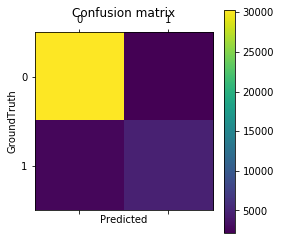

Confusion matrix

 [[30335  2180]
 [ 2700  4785]]

True Positives(TP) =  30335

True Negatives(TN) =  4785

False Positives(FP) =  2180

False Negatives(FN) =  2700
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     32515
           1       0.69      0.64      0.66      7485

    accuracy                           0.88     40000
   macro avg       0.80      0.79      0.79     40000
weighted avg       0.87      0.88      0.88     40000

Overall Accuracy: 0.878


In [48]:
y_lgbm1_pred2 = lgbc.predict_proba(X_test)
lgbm1_score = log_loss(y_true=y_test,y_pred=y_lgbm1_pred2)
print('log_loss: {}'.format(lgbm1_score))
conftable(y_test,y_lgbm1_pred,'conf')

- Of all the classifiers trained, LightGBM performed best with a logloss of 0.25487.
- The LightGBM model classified labels for the testing set best.
  - Hence LightGBM model will be selected as the baseline model and be optimized..

### Hyper_parameter Tuning of best performing baseline model...

In [34]:
lgb = lgbm.LGBMClassifier(objective= 'binary',
         boosting='gbdt',n_estimators = 150,
         eval_metric='binary_logloss',
         learning_rate=0.01, 
         num_iterations=2000,
         max_depth=10,
         min_data_in_leaf=35,
         bagging_fraction=0.8,
         bagging_freq=1,cat_col= X.select_dtypes('object').columns.tolist(),
         feature_fraction=0.8,
         num_leaves=55,
        verbose_eval=250,num_boost_rounds=5000)
f = lgb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],
        early_stopping_rounds=200,verbose=250,eval_metric='binary_logloss')


Training until validation scores don't improve for 200 rounds
[250]	training's binary_logloss: 0.257537	valid_1's binary_logloss: 0.260305
[500]	training's binary_logloss: 0.247812	valid_1's binary_logloss: 0.253208
[750]	training's binary_logloss: 0.244767	valid_1's binary_logloss: 0.252832
[1000]	training's binary_logloss: 0.242575	valid_1's binary_logloss: 0.252787
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.242226	valid_1's binary_logloss: 0.252779


 - The objective is Binary classification!
 - The best logloss metric (0.252779) during the iterative model building process..
 - max depth was set to 10 to combat and prevent **overfitting**
 - Very High number of iteration was used alongside small learning_rate to increase model accuracy\
 

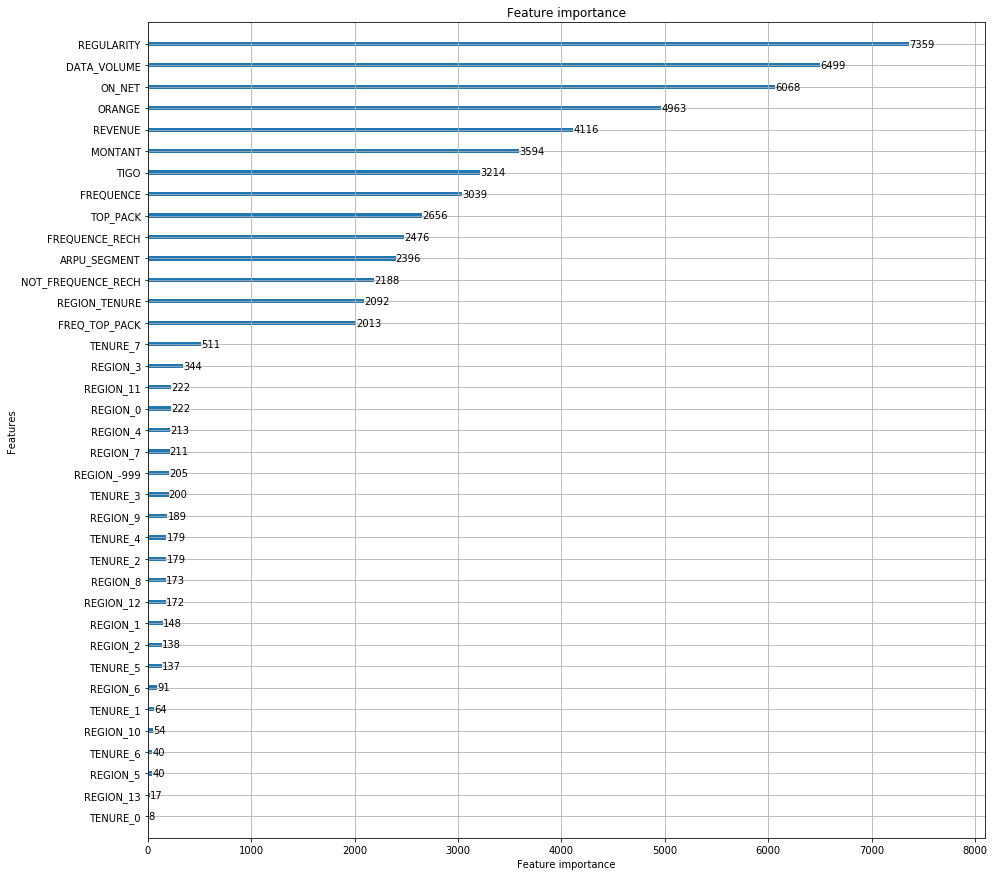

In [35]:
lgbm.plot_importance(f,max_num_features=40,figsize=(15,15))

 - From the feature importance barchart generated by the LGBMClassifier we see that **REGULARITY**,**DATA_VOLUME** and **ON_NET** are the most important features considered by the model..

### Model Evaluation using Cross_Validation

- We have approached evaluating our model using train_test_split but a much better means of model evaluation is cross validation
    - stratified k-fold and KFold are forms of cross-validation.
    - stratified k-fold works well for classifaction task with imbalanced clas distribution. 
       - KFold doesnt take that into consideration.
- Therefore in this our classification task which the distribution of the target class is imbalanced we prefer StratifiedKfold to KFold

 - cross_val_score flips the result value for error or loss metrics while it preserve sign for score metrics
    - for example mean_absolute_error and log_loss would be neg_mean_absolute_error  and neg_log_los would retain the same magnitude but returns negative value of metric

In [36]:
losslgb = []
pred_lgb = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf.get_n_splits(X,y)
print(skf)
#cross validation loop...

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    #train_data = lgb.Dataset(X_train, label=y_train)
    #test_data = lgb.Dataset(X_test, label=y_test)
    
    estimator = lgbm.LGBMClassifier(objective= 'binary',
         boosting='gbdt',n_estimators = 150,
         eval_metric='binary_logloss',
         learning_rate=0.01, 
         num_iterations=2000,
         max_depth=10,######
         min_data_in_leaf=35,
         bagging_fraction=0.8,
         bagging_freq=1,
         feature_fraction=0.8,
         num_leaves=55,cat_col= X.select_dtypes('object').columns.tolist(),
        verbose_eval=250,num_boost_rounds=5000)
    ## fit on 9/10th of the entire data(train.csv) and evaluate using the held-out set.
    #iterative for each cross_validation loop!
    estimator.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],
                 early_stopping_rounds=200,verbose=250,eval_metric='binary_logloss')
    
    ## we are now making prediction based on the "test dataset" stored with variable name "X_test2" 
    ## we are using "predict_proba()" as we are required to predict the likelihood(probability) of a user churning
    ## "[:,1]", this helps to select only the probabilites of churning (i.e 1), if we use "[:, 0]" it selects the probalities of not-churning (i.e 0)
    
    y_pred = estimator.predict_proba(X_test)[:,1] 

    print("Log_loss: ", log_loss(y_test, y_pred))
    # append logloss metric per each iteration in a predefined list.
    losslgb.append(log_loss(y_test, y_pred))
    
    p = estimator.predict_proba(test)[:,1]
    #append estimated probabilities per each iteration in a predefined list.
    pred_lgb.append(p)

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Training until validation scores don't improve for 200 rounds
[250]	training's binary_logloss: 0.258121	valid_1's binary_logloss: 0.259428
[500]	training's binary_logloss: 0.248753	valid_1's binary_logloss: 0.25186
[750]	training's binary_logloss: 0.246007	valid_1's binary_logloss: 0.251316
[1000]	training's binary_logloss: 0.243997	valid_1's binary_logloss: 0.251262
[1250]	training's binary_logloss: 0.242255	valid_1's binary_logloss: 0.251277
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.243333	valid_1's binary_logloss: 0.251234
Log_loss:  0.2512344064544799
Training until validation scores don't improve for 200 rounds
[250]	training's binary_logloss: 0.258133	valid_1's binary_logloss: 0.259054
[500]	training's binary_logloss: 0.248735	valid_1's binary_logloss: 0.251871
[750]	training's binary_logloss: 0.245974	valid_1's binary_logloss: 0.251488
[1000]	training's binary_logloss: 0.243964	valid_1's bin

In [37]:
#mean logloss from cross validation...
np.mean(losslgb)

0.2521413969082334

In [38]:
##predicted probability/likelihood of customer leaving (i.e target 1)
y_pred = np.array(pred_lgb).mean(axis=0)

In [49]:


## so I created a dictionary with the "user_id" from the "test_dataset" and the new predictions "y_pred"
## we turn the dictionary into a pandas dataframe using "pd.DataFrame()"
## we then export the dataframe into a csv file using ".to_csv"
pd.DataFrame({"user_id": df_test["user_id"], "CHURN": y_pred}).to_csv("starter-submission(lgbm)x.csv", index = False)


In [52]:
submission = pd.read_csv("starter-submission(lgbm)x.csv")
submission.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.781131
1,5335efd940280b82143272275637d1e65d37eadb,0.668453
2,a581f4fa08677c26f83f643248c667e241043086,0.121469
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.001423
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.000334
